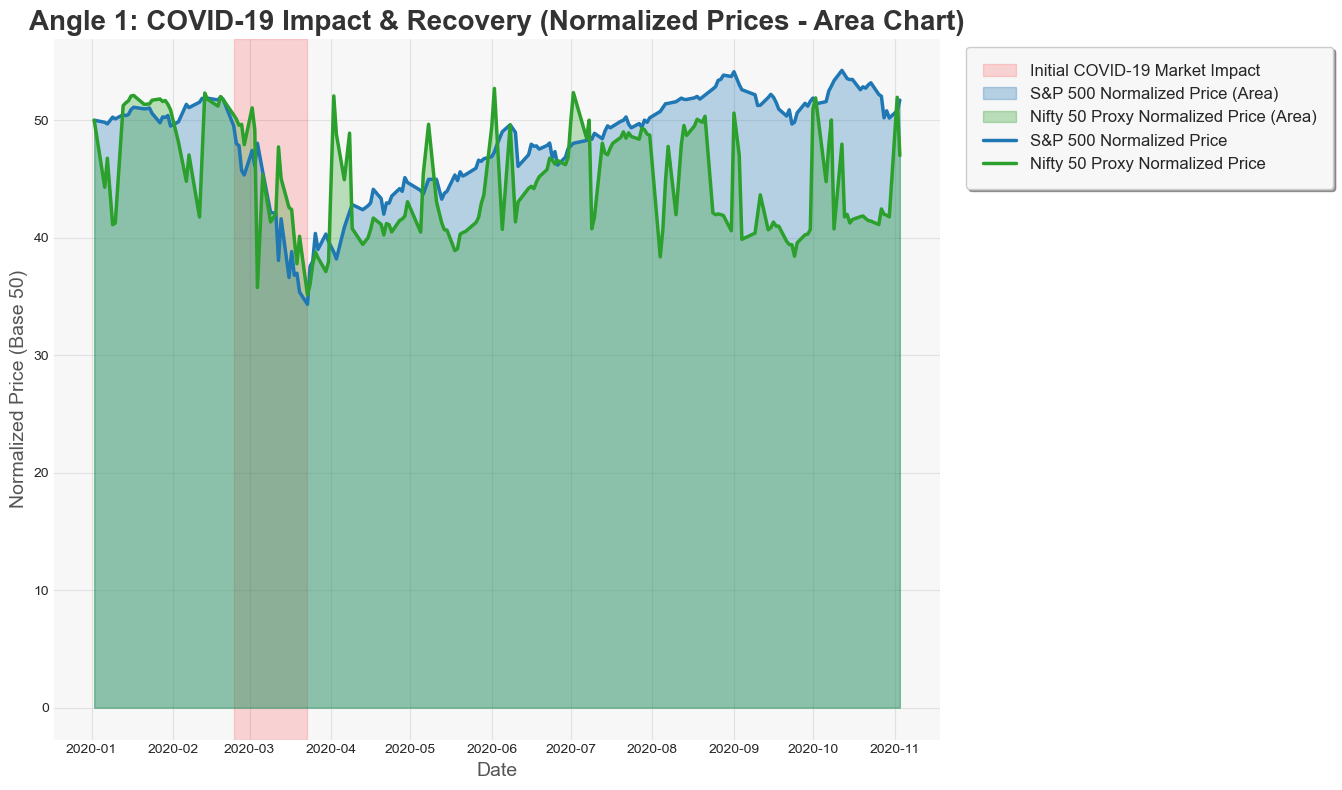

Angle 1: Normalized Prices Area Chart generated and saved as 'covid_angle1_normalized_prices_area_chart.png'


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- 1. Load the Datasets ---
try:
    sp500_df = pd.read_csv('SPX.csv', parse_dates=['Date'])
    nifty50_stocks_df = pd.read_csv('Final-50-stocks.csv', parse_dates=['DATE'])
except FileNotFoundError:
    print("Error: Make sure 'SPX.csv' and 'Final-50-stocks.csv' are in the same directory as this script.")
    print("Please ensure the files are correctly uploaded or placed in the working directory.")
    exit()

# --- 2. Data Preprocessing ---

# S&P 500 Data: Select 'Date' and 'Adj Close'
sp500_df = sp500_df[['Date', 'Adj Close']].copy()
sp500_df.columns = ['Date', 'SP500_Close'] # Rename for consistency
sp500_df = sp500_df.sort_values(by='Date').set_index('Date')

# Nifty 50 Data: Calculate a proxy for Nifty 50 Index
nifty50_stocks_df = nifty50_stocks_df.rename(columns={'DATE': 'Date'})
nifty50_stocks_df = nifty50_stocks_df.sort_values(by='Date').set_index('Date')

stock_tickers = nifty50_stocks_df.columns.tolist()
for col in stock_tickers:
    nifty50_stocks_df[col] = pd.to_numeric(nifty50_stocks_df[col], errors='coerce')

nifty50_stocks_df['Nifty50_Proxy_Close'] = nifty50_stocks_df[stock_tickers].mean(axis=1)

nifty50_proxy_df = nifty50_stocks_df[['Nifty50_Proxy_Close']].copy() # Already indexed by Date
nifty50_proxy_df.columns = ['Nifty50_Close']

# Merge the datasets on 'Date' (index)
merged_df = pd.merge(sp500_df, nifty50_proxy_df, on='Date', how='inner')

# Filter for relevant date range (Nifty 50 data starts from 2010)
merged_df = merged_df.loc['2010-01-01':]

# --- 3. Define COVID-19 Period for Zooming and Shading ---
covid_start = pd.to_datetime('2020-01-01')
covid_end = pd.to_datetime('2021-06-01') # Limited by SPX.csv data ending Nov 2020

# Define the period of the sharpest market downturn for shading
crisis_start = pd.to_datetime('2020-02-24') # COVID-19 Initial Market Drop
crisis_end = pd.to_datetime('2020-03-23') # COVID-19 Market Trough

# Filter DataFrame to the COVID-19 period for plotting
covid_period_df = merged_df.loc[covid_start:covid_end].copy()

# Check if covid_period_df is empty after filtering
if covid_period_df.empty:
    print("No data available for the specified COVID-19 period in the merged dataset.")
    exit()

# Re-normalize prices for the ZOOMED-IN period to start at 50
normalization_base = 50
initial_sp500_covid_zoom = covid_period_df['SP500_Close'].iloc[0]
initial_nifty50_covid_zoom = covid_period_df['Nifty50_Close'].iloc[0]

covid_period_df['SP500_Normalized_Covid_Zoom'] = (covid_period_df['SP500_Close'] / initial_sp500_covid_zoom) * normalization_base
covid_period_df['Nifty50_Normalized_Covid_Zoom'] = (covid_period_df['Nifty50_Close'] / initial_nifty50_covid_zoom) * normalization_base


# --- 4. Generate the Area Chart (Angle 1) ---
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams.update({
    'font.size': 10, 'axes.labelsize': 12, 'axes.titlesize': 16,
    'xtick.labelsize': 10, 'ytick.labelsize': 10, 'axes.facecolor': '#f7f7f7',
    'figure.facecolor': 'white', 'grid.linestyle': '-', 'grid.alpha': 0.5,
    'grid.color': '#cccccc', 'axes.spines.top': False, 'axes.spines.right': False,
    'axes.spines.left': True, 'axes.spines.bottom': True, 'axes.edgecolor': '#cccccc'
})

fig1, ax1 = plt.subplots(figsize=(16, 8))

# Add shaded region for the crisis period
ax1.axvspan(crisis_start, crisis_end, color='red', alpha=0.15, label='Initial COVID-19 Market Impact')

# Plotting the filled areas
ax1.fill_between(covid_period_df.index, covid_period_df['SP500_Normalized_Covid_Zoom'], color='#1f77b4', alpha=0.3, label='S&P 500 Normalized Price (Area)')
ax1.fill_between(covid_period_df.index, covid_period_df['Nifty50_Normalized_Covid_Zoom'], color='#2ca02c', alpha=0.3, label='Nifty 50 Proxy Normalized Price (Area)')

# Plotting lines on top of areas for clarity
ax1.plot(covid_period_df.index, covid_period_df['SP500_Normalized_Covid_Zoom'], color='#1f77b4', linewidth=2.5, label='S&P 500 Normalized Price')
ax1.plot(covid_period_df.index, covid_period_df['Nifty50_Normalized_Covid_Zoom'], color='#2ca02c', linewidth=2.5, label='Nifty 50 Proxy Normalized Price')

ax1.set_title('Angle 1: COVID-19 Impact & Recovery (Normalized Prices - Area Chart)', fontsize=20, fontweight='bold', color='#333333')
ax1.set_xlabel('Date', fontsize=14, color='#555555')
ax1.set_ylabel(f'Normalized Price (Base {normalization_base})', fontsize=14, color='#555555')

# Improve legend placement and style
# --- CHANGE MADE HERE: Moved legend outside the plot area ---
handles1, labels1 = ax1.get_legend_handles_labels()
final_labels1 = []
final_handles1 = []
seen_labels1 = set()
for h, l in zip(handles1, labels1):
    if l not in seen_labels1:
        final_labels1.append(l)
        final_handles1.append(h)
        seen_labels1.add(l)
# Place legend outside the plot area, to the upper right
ax1.legend(final_handles1, final_labels1, loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=12, frameon=True, fancybox=True, shadow=True, borderpad=1)

plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust tight_layout to make space for the legend on the right
plt.savefig('covid_angle1_normalized_prices_area_chart.png')
plt.show()
plt.close(fig1)

print("Angle 1: Normalized Prices Area Chart generated and saved as 'covid_angle1_normalized_prices_area_chart.png'")


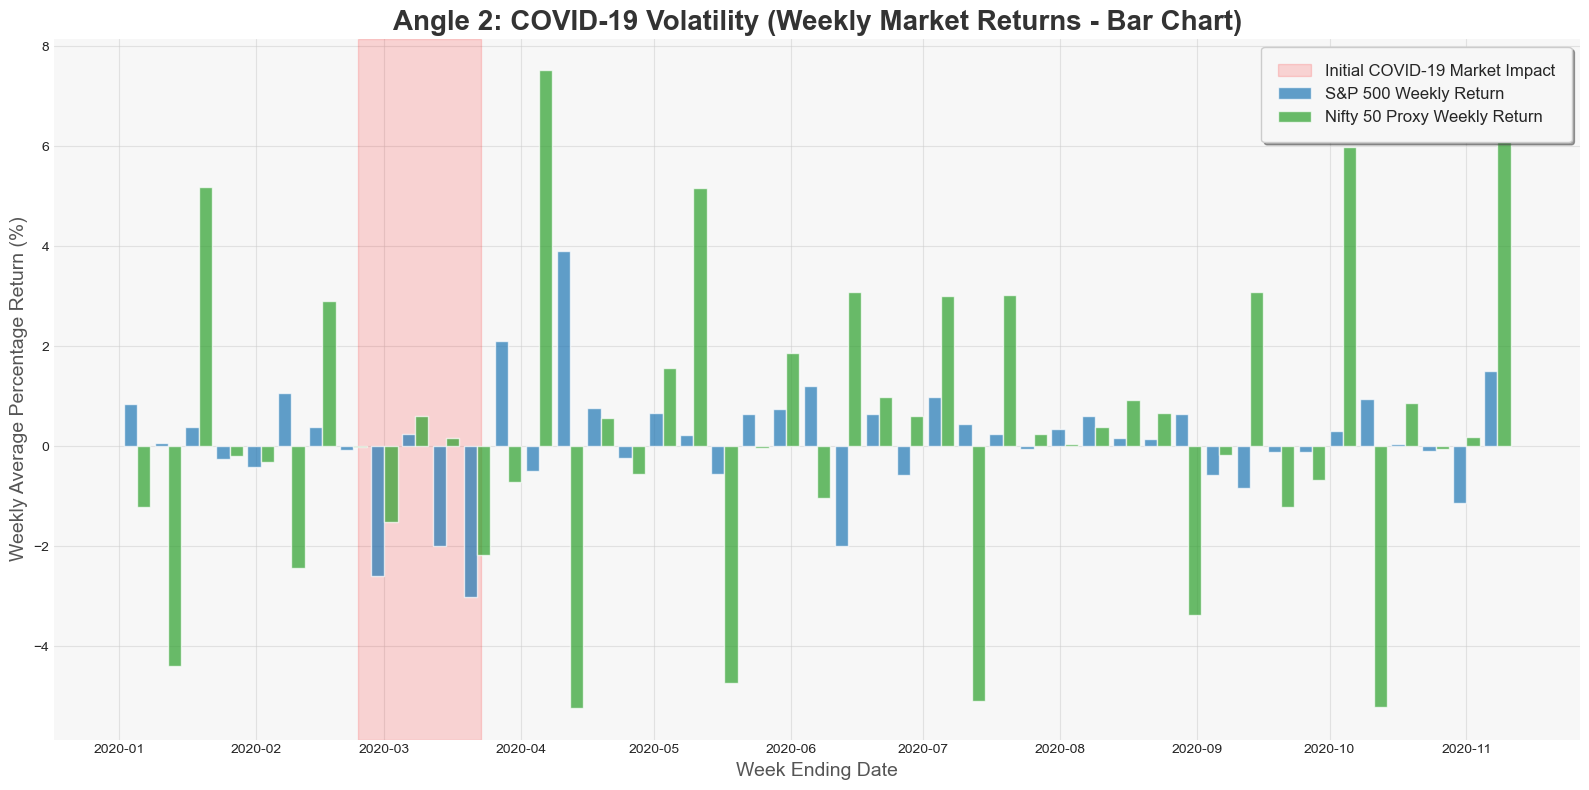

Angle 2: Weekly Returns Bar Chart generated and saved as 'covid_angle2_weekly_returns_bar_chart.png'


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- 1. Load the Datasets ---
try:
    sp500_df = pd.read_csv('SPX.csv', parse_dates=['Date'])
    nifty50_stocks_df = pd.read_csv('Final-50-stocks.csv', parse_dates=['DATE'])
except FileNotFoundError:
    print("Error: Make sure 'SPX.csv' and 'Final-50-stocks.csv' are in the same directory as this script.")
    print("Please ensure the files are correctly uploaded or placed in the working directory.")
    exit()

# --- 2. Data Preprocessing ---

# S&P 500 Data: Select 'Date' and 'Adj Close'
sp500_df = sp500_df[['Date', 'Adj Close']].copy()
sp500_df.columns = ['Date', 'SP500_Close'] # Rename for consistency
sp500_df = sp500_df.sort_values(by='Date').set_index('Date')

# Nifty 50 Data: Calculate a proxy for Nifty 50 Index
nifty50_stocks_df = nifty50_stocks_df.rename(columns={'DATE': 'Date'})
nifty50_stocks_df = nifty50_stocks_df.sort_values(by='Date').set_index('Date')

stock_tickers = nifty50_stocks_df.columns.tolist()
for col in stock_tickers:
    nifty50_stocks_df[col] = pd.to_numeric(nifty50_stocks_df[col], errors='coerce')

nifty50_stocks_df['Nifty50_Proxy_Close'] = nifty50_stocks_df[stock_tickers].mean(axis=1)

nifty50_proxy_df = nifty50_stocks_df[['Nifty50_Proxy_Close']].copy() # Already indexed by Date
nifty50_proxy_df.columns = ['Nifty50_Close']

# Merge the datasets on 'Date' (index)
merged_df = pd.merge(sp500_df, nifty50_proxy_df, on='Date', how='inner')

# Filter for relevant date range (Nifty 50 data starts from 2010)
merged_df = merged_df.loc['2010-01-01':]

# Calculate Daily Percentage Returns
merged_df['SP500_Returns'] = merged_df['SP500_Close'].pct_change() * 100
merged_df['Nifty50_Returns'] = merged_df['Nifty50_Close'].pct_change() * 100

# --- 3. Define COVID-19 Period for Zooming and Shading ---
covid_start = pd.to_datetime('2020-01-01')
covid_end = pd.to_datetime('2021-06-01') # Limited by SPX.csv data ending Nov 2020

# Define the period of the sharpest market downturn for shading
crisis_start = pd.to_datetime('2020-02-24') # COVID-19 Initial Market Drop
crisis_end = pd.to_datetime('2020-03-23') # COVID-19 Market Trough

# Filter DataFrame to the COVID-19 period for plotting
covid_period_df = merged_df.loc[covid_start:covid_end].copy()

# Check if covid_period_df is empty after filtering
if covid_period_df.empty:
    print("No data available for the specified COVID-19 period in the merged dataset.")
    exit()

# --- Set Global Plotting Style ---
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams.update({
    'font.size': 10, 'axes.labelsize': 12, 'axes.titlesize': 16,
    'xtick.labelsize': 10, 'ytick.labelsize': 10, 'axes.facecolor': '#f7f7f7',
    'figure.facecolor': 'white', 'grid.linestyle': '-', 'grid.alpha': 0.5,
    'grid.color': '#cccccc', 'axes.spines.top': False, 'axes.spines.right': False,
    'axes.spines.left': True, 'axes.spines.bottom': True, 'axes.edgecolor': '#cccccc'
})


# --- 4. Generate the Weekly Returns Bar Chart (Angle 2) ---

# Resample daily returns to weekly mean returns
weekly_returns_sp500 = covid_period_df['SP500_Returns'].resample('W').mean().dropna()
weekly_returns_nifty50 = covid_period_df['Nifty50_Returns'].resample('W').mean().dropna()

# Create a DataFrame for plotting
weekly_returns_df = pd.DataFrame({
    'S&P 500': weekly_returns_sp500,
    'Nifty 50 Proxy': weekly_returns_nifty50
}).dropna() # Drop any weeks with missing data after resampling

fig2, ax2 = plt.subplots(figsize=(16, 8))

# Add shaded region for the crisis period
ax2.axvspan(crisis_start, crisis_end, color='red', alpha=0.15, label='Initial COVID-19 Market Impact')

# Define bar width relative to date units (e.g., 3 days for weekly data, to ensure bars are distinct)
bar_width_days = 3
# Plotting bars for S&P 500 (slightly offset to the left)
ax2.bar(weekly_returns_df.index - pd.Timedelta(days=bar_width_days/2), weekly_returns_df['S&P 500'],
        width=pd.Timedelta(days=bar_width_days), color='#1f77b4', alpha=0.7, label='S&P 500 Weekly Return')

# Plotting bars for Nifty 50 Proxy (slightly offset to the right for clarity)
ax2.bar(weekly_returns_df.index + pd.Timedelta(days=bar_width_days/2), weekly_returns_df['Nifty 50 Proxy'],
        width=pd.Timedelta(days=bar_width_days), color='#2ca02c', alpha=0.7, label='Nifty 50 Proxy Weekly Return')

ax2.set_title('Angle 2: COVID-19 Volatility (Weekly Market Returns - Bar Chart)', fontsize=20, fontweight='bold', color='#333333')
ax2.set_xlabel('Week Ending Date', fontsize=14, color='#555555')
ax2.set_ylabel('Weekly Average Percentage Return (%)', fontsize=14, color='#555555')

ax2.legend(loc='upper right', fontsize=12, frameon=True, fancybox=True, shadow=True, borderpad=1)

plt.tight_layout()
plt.savefig('covid_angle2_weekly_returns_bar_chart.png')
plt.show()
plt.close(fig2)

print("Angle 2: Weekly Returns Bar Chart generated and saved as 'covid_angle2_weekly_returns_bar_chart.png'")


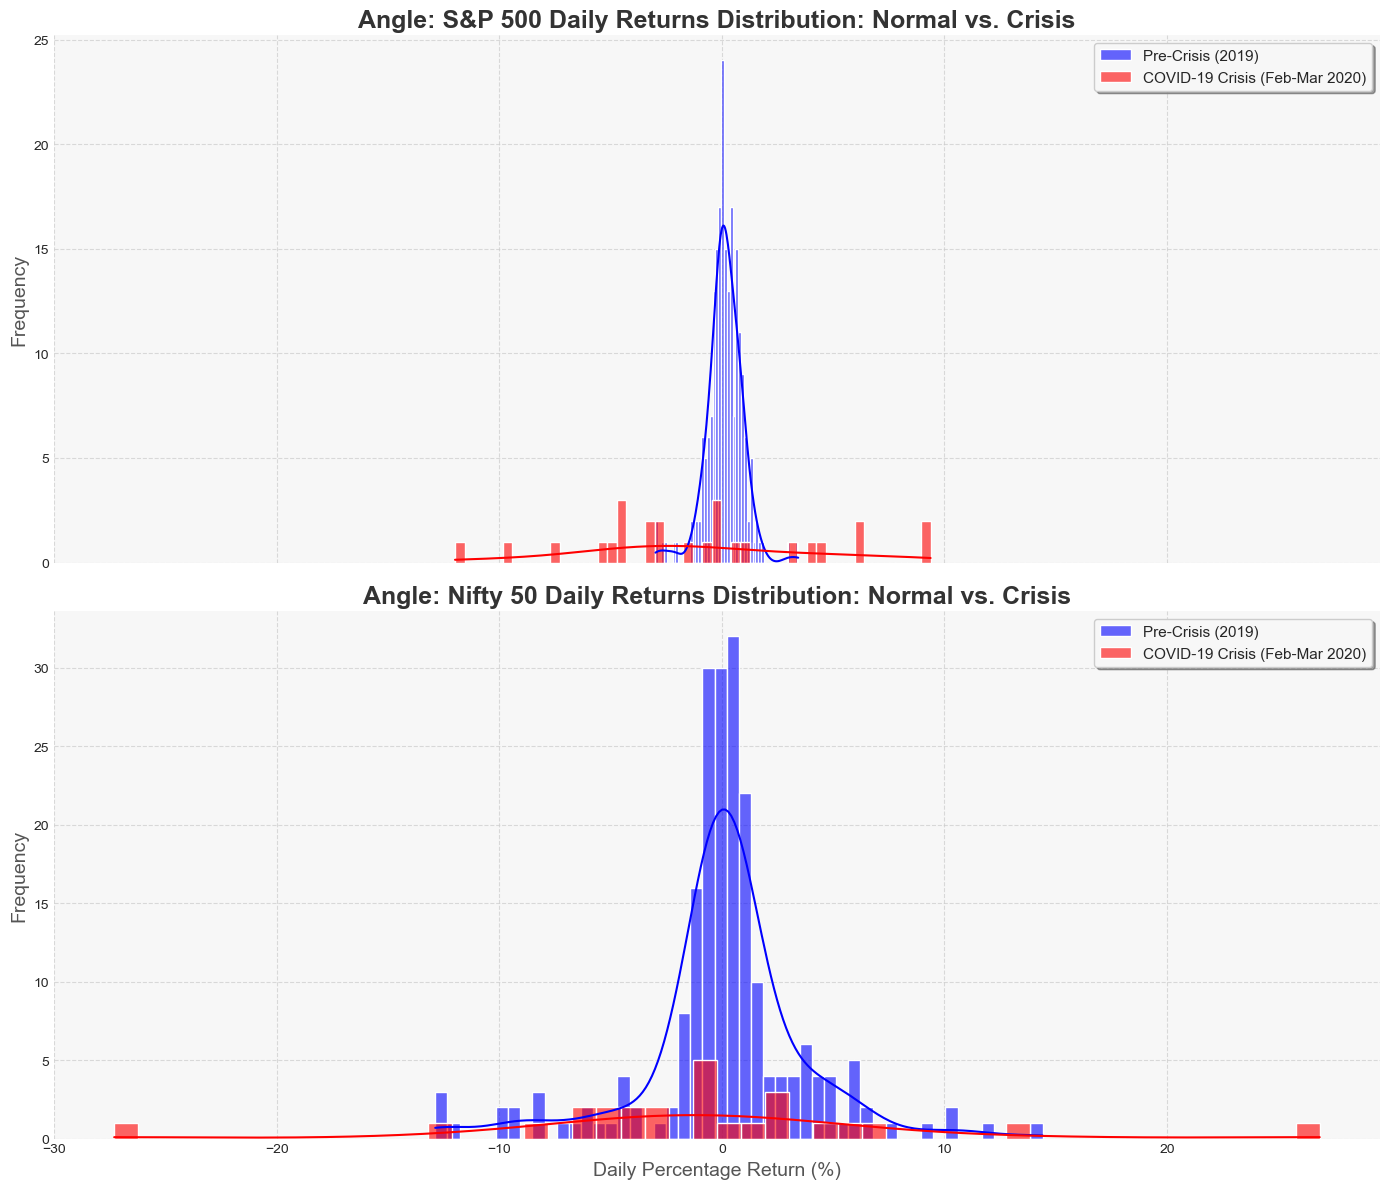

Daily Returns Distribution Histograms generated and saved as 'covid_angle_returns_distribution_histograms.png'


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# --- 1. Load the Datasets ---
try:
    sp500_df = pd.read_csv('SPX.csv', parse_dates=['Date'])
    nifty50_stocks_df = pd.read_csv('Final-50-stocks.csv', parse_dates=['DATE'])
except FileNotFoundError:
    print("Error: Make sure 'SPX.csv' and 'Final-50-stocks.csv' are in the same directory as this script.")
    print("Please ensure the files are correctly uploaded or placed in the working directory.")
    exit()

# --- 2. Data Preprocessing ---

# S&P 500 Data: Select 'Date' and 'Adj Close'
sp500_df = sp500_df[['Date', 'Adj Close']].copy()
sp500_df.columns = ['Date', 'SP500_Close'] # Rename for consistency
sp500_df = sp500_df.sort_values(by='Date').set_index('Date')

# Nifty 50 Data: Calculate a proxy for Nifty 50 Index
nifty50_stocks_df = nifty50_stocks_df.rename(columns={'DATE': 'Date'})
nifty50_stocks_df = nifty50_stocks_df.sort_values(by='Date').set_index('Date')

stock_tickers = nifty50_stocks_df.columns.tolist()
for col in stock_tickers:
    nifty50_stocks_df[col] = pd.to_numeric(nifty50_stocks_df[col], errors='coerce')

nifty50_stocks_df['Nifty50_Proxy_Close'] = nifty50_stocks_df[stock_tickers].mean(axis=1)

nifty50_proxy_df = nifty50_stocks_df[['Nifty50_Proxy_Close']].copy() # Already indexed by Date
nifty50_proxy_df.columns = ['Nifty50_Close']

# Merge the datasets on 'Date' (index)
merged_df = pd.merge(sp500_df, nifty50_proxy_df, on='Date', how='inner')

# Filter for relevant date range (Nifty 50 data starts from 2010)
merged_df = merged_df.loc['2010-01-01':]

# Calculate Daily Percentage Returns
merged_df['SP500_Returns'] = merged_df['SP500_Close'].pct_change() * 100
merged_df['Nifty50_Returns'] = merged_df['Nifty50_Close'].pct_change() * 100

# --- 3. Define Periods for Comparison ---

# Pre-Crisis "Normal" Period (e.g., a full year before the crisis)
pre_crisis_start = pd.to_datetime('2019-01-01')
pre_crisis_end = pd.to_datetime('2019-12-31')

# COVID-19 Crisis Period (initial sharp impact)
crisis_start = pd.to_datetime('2020-02-20') # Start of significant global market sell-off
crisis_end = pd.to_datetime('2020-03-31') # End of initial sharp decline/trough

# Filter returns for these periods
sp500_returns_pre_crisis = merged_df.loc[pre_crisis_start:pre_crisis_end, 'SP500_Returns'].dropna()
nifty50_returns_pre_crisis = merged_df.loc[pre_crisis_start:pre_crisis_end, 'Nifty50_Returns'].dropna()

sp500_returns_crisis = merged_df.loc[crisis_start:crisis_end, 'SP500_Returns'].dropna()
nifty50_returns_crisis = merged_df.loc[crisis_start:crisis_end, 'Nifty50_Returns'].dropna()

# Check if data is available for the periods
if sp500_returns_pre_crisis.empty or nifty50_returns_pre_crisis.empty or \
   sp500_returns_crisis.empty or nifty50_returns_crisis.empty:
    print("Not enough data available for one or more comparison periods. Please check date ranges.")
    exit()

# --- 4. Generate Histograms Comparison ---

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams.update({
    'font.size': 10, 'axes.labelsize': 12, 'axes.titlesize': 16,
    'xtick.labelsize': 10, 'ytick.labelsize': 10, 'axes.facecolor': '#f7f7f7',
    'figure.facecolor': 'white', 'grid.linestyle': '-', 'grid.alpha': 0.5,
    'grid.color': '#cccccc', 'axes.spines.top': False, 'axes.spines.right': False,
    'axes.spines.left': True, 'axes.spines.bottom': True, 'axes.edgecolor': '#cccccc'
})

fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True) # Two subplots, sharing X-axis

# --- S&P 500 Returns Distribution ---
sns.histplot(sp500_returns_pre_crisis, bins=50, kde=True, color='blue', alpha=0.6, label='Pre-Crisis (2019)', ax=axes[0])
sns.histplot(sp500_returns_crisis, bins=50, kde=True, color='red', alpha=0.6, label='COVID-19 Crisis (Feb-Mar 2020)', ax=axes[0])
axes[0].set_title('Angle: S&P 500 Daily Returns Distribution: Normal vs. Crisis', fontsize=18, fontweight='bold', color='#333333')
axes[0].set_ylabel('Frequency', fontsize=14, color='#555555')
axes[0].legend(fontsize=11, frameon=True, fancybox=True, shadow=True)
axes[0].grid(True, linestyle='--', alpha=0.7)


# --- Nifty 50 Returns Distribution ---
sns.histplot(nifty50_returns_pre_crisis, bins=50, kde=True, color='blue', alpha=0.6, label='Pre-Crisis (2019)', ax=axes[1])
sns.histplot(nifty50_returns_crisis, bins=50, kde=True, color='red', alpha=0.6, label='COVID-19 Crisis (Feb-Mar 2020)', ax=axes[1])
axes[1].set_title('Angle: Nifty 50 Daily Returns Distribution: Normal vs. Crisis', fontsize=18, fontweight='bold', color='#333333')
axes[1].set_xlabel('Daily Percentage Return (%)', fontsize=14, color='#555555')
axes[1].set_ylabel('Frequency', fontsize=14, color='#555555')
axes[1].legend(fontsize=11, frameon=True, fancybox=True, shadow=True)
axes[1].grid(True, linestyle='--', alpha=0.7)


plt.tight_layout()
plt.savefig('covid_angle_returns_distribution_histograms.png')
plt.show()
plt.close(fig)

print("Daily Returns Distribution Histograms generated and saved as 'covid_angle_returns_distribution_histograms.png'")
